# Decision Trees    

## 1. Import, Visualize and Describe the IRIS dataset

### 1.1. Import

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

### 1.2. Visualize

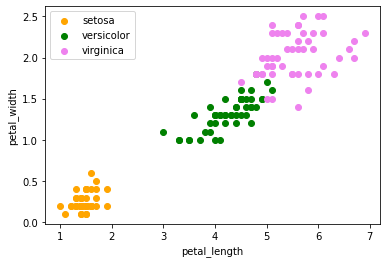

In [33]:
###  ---  Plotting  ---
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(X, columns=['petal_length', 'petal_width'])
df['Y'] = pd.Series(y)

plt.scatter(df[df['Y']==0]['petal_length'], df[df['Y']==0]['petal_width'], label='setosa', color='orange')
plt.scatter(df[df['Y']==1]['petal_length'], df[df['Y']==1]['petal_width'], label='versicolor', color='green')
plt.scatter(df[df['Y']==2]['petal_length'], df[df['Y']==2]['petal_width'], label='virginica', color='violet')

# Prettify the graph
plt.legend()
plt.xlabel('petal_length')
plt.ylabel('petal_width')

# # scale
# plt.xticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])    # changing x1 scale by own
# plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])    # changing x2 scale by own

# display
plt.show()

### 1.3. Describe

In [35]:
print(iris.feature_names[2:])
print(iris.target_names)
print(iris.DESCR)

['petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   

## 2. Train and Visualize the Decision Tree Model

### 2.1. Train

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2)

### 2.2. Visualize

In [44]:
from sklearn.tree import export_graphviz

image_dot_name = 'outputs/iris_tree.dot'
image_png_name = 'outputs/iris_tree.png'
f = open(image_dot_name, 'w')

export_graphviz(
        tree_clf,
        out_file=f,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [45]:
# run two times
!dot -Tpng {image_dot_name} -o {image_png_name} 
!ls outputs/iris*

outputs/iris_tree.dot  outputs/iris_tree.png


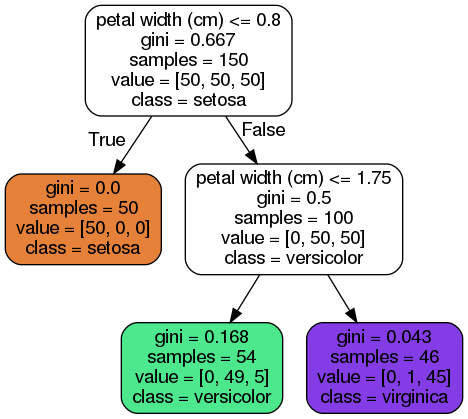

In [46]:
from IPython.display import Image
Image(filename=image_png_name) 

- node’s `samples` attribute counts how  many  training  instances  it  applies  to.
- node’s `value` attribute tells you how  many  training  instances  of  each  class  this  node applies to.
- node’s  `gini`  attribute  measures  its  impurity:  a  node  is “pure”  (gini=0)  if  all  training  instances  it  applies  to  belong  to  the  same  class.

In [48]:
%%latex
\begin{equation}
    G_i = 1 - \sum_{K=1}^{n}P_{i,K}^2
\end{equation}

<IPython.core.display.Latex object>